# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat1"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.6794221997261047
Epoch 1, Loss 1.6626912355422974
Epoch 2, Loss 1.6738612651824951
Epoch 3, Loss 1.6485814452171326
Epoch 4, Loss 1.6562187671661377
Epoch 5, Loss 1.6468102931976318
Epoch 6, Loss 1.6250784993171692
Epoch 7, Loss 1.5982484817504883
Epoch 8, Loss 1.6156111359596252
Epoch 9, Loss 1.5921460390090942
Epoch 10, Loss 1.5657485127449036
Epoch 11, Loss 1.5701165199279785
Epoch 12, Loss 1.5600385665893555
Epoch 13, Loss 1.5302943587303162
Epoch 14, Loss 1.520532250404358
Epoch 15, Loss 1.5194448232650757
Epoch 16, Loss 1.498064935207367
Epoch 17, Loss 1.4592588543891907
Epoch 18, Loss 1.4987941980361938
Epoch 19, Loss 1.4568958282470703
Epoch 20, Loss 1.474300742149353
Epoch 21, Loss 1.4517217874526978
Epoch 22, Loss 1.4494791626930237
Epoch 23, Loss 1.437042474746704
Epoch 24, Loss 1.4338584542274475
Epoch 25, Loss 1.3789883852005005
Epoch 26, Loss 1.3967883586883545
Epoch 27, Loss 1.3901941180229187
Epoch 28, Loss 1.3972552418708801
Epoch 29, Loss 1.35268867015

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

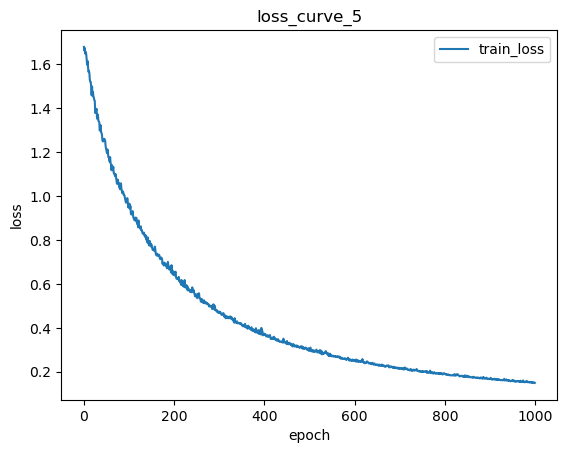

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[74, 0], [0, 22]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


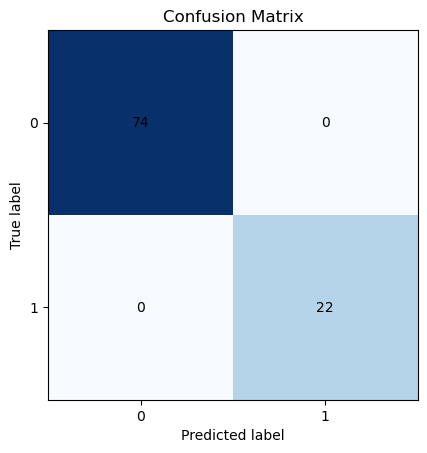

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

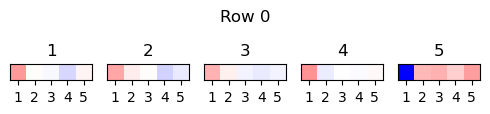

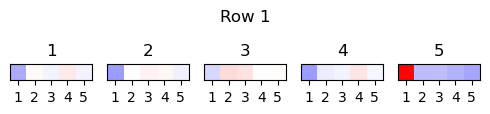

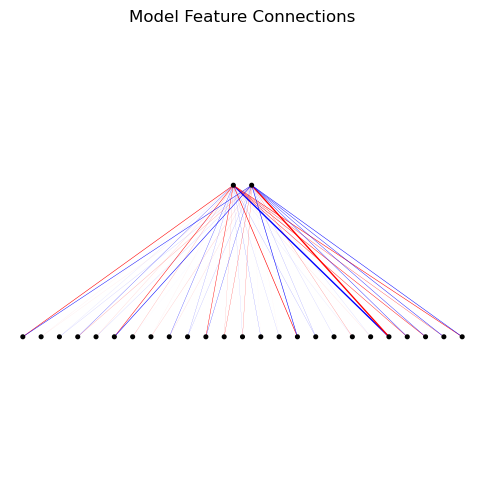

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()